<a href="https://colab.research.google.com/github/Deeksha0209/Capstone-Project/blob/main/Minutes_Merged_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJECTIVE -- Data Cleaning and EDA on Daily Activity Dataset.**

In [ ]:
#Step 1 is importing our required libraries & loading our dataframes using pd.read_csv function.
import pandas as pd
import numpy as np
import seaborn as sns
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/ORIGINAL DATA /minuteCaloriesNarrow_merged.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/ORIGINAL DATA /minuteIntensitiesNarrow_merged.csv")

In [ ]:
#I am merging the dfs first hand ( in order to avoid RAM issues)
MinutesMerged_df = pd.merge(df1,df2, how='left', on=['Id','ActivityMinute'])

In [ ]:
#Loading other dataframes
df4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/ORIGINAL DATA /minuteMETsNarrow_merged.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/ORIGINAL DATA /minuteStepsNarrow_merged.csv")


In [ ]:
#Merging DFs
MinutesMerged_df = pd.merge(MinutesMerged_df,df3, how='left', on=['Id','ActivityMinute'])

In [ ]:
MinutesMerged_df = pd.merge(MinutesMerged_df,df4, how='left', on=['Id','ActivityMinute'])

In [ ]:
#Displaying top entries of our final df
MinutesMerged_df.head(2)

,Id,ActivityMinute,Calories,Intensity,Steps,METs
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0,0,10
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0,0,10


In [ ]:
#Displaying bottom entries of the final df!
MinutesMerged_df.tail(2)

,Id,ActivityMinute,Calories,Intensity,Steps,METs
1325578,8877689391,5/12/2016 1:58:00 PM,1.33353,0,0,11
1325579,8877689391,5/12/2016 1:59:00 PM,1.33353,0,0,11


In [ ]:
#Displaying data types of final df
MinutesMerged_df.dtypes

Id                  int64
ActivityMinute     object
Calories          float64
Intensity           int64
Steps               int64
METs                int64
dtype: object

In [ ]:
#Updated shape of our df
MinutesMerged_df.shape

(1325580, 6)

In [ ]:
#Lets see a stats summary!
MinutesMerged_df.describe()

,Id,Calories,Intensity,Steps,METs
count,1.325580e+06,1.325580e+06,1.325580e+06,1.325580e+06,1.325580e+06
mean,4.847898e+09,1.623130e+00,2.005937e-01,5.336192e+00,1.469001e+01
std,2.422313e+09,1.410447e+00,5.190227e-01,1.812830e+01,1.205541e+01
min,1.503960e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.320127e+09,9.357000e-01,0.000000e+00,0.000000e+00,1.000000e+01
50%,4.445115e+09,1.217600e+00,0.000000e+00,0.000000e+00,1.000000e+01
75%,6.962181e+09,1.432700e+00,0.000000e+00,0.000000e+00,1.100000e+01
max,8.877689e+09,1.974995e+01,3.000000e+00,2.200000e+02,1.570000e+02


#Description of Dataset -

This dataset encompasses Fitbit users' fitness tracking data spread across multiple datasets and columns. Compiled by Amazon Mechanical Turk, this diverse dataset offers comprehensive fitness information for users. The "Minutes Merged" dataframe includes data on calories, intensity, steps & Mets for various users across different days and time intervals. Our analysis delves into key aspects of each section, conducting thorough exploratory data analysis supplemented with detailed visualizations to enhance understanding and extract valuable insights.

# **#Data Cleaning Steps for our final df!**

In [ ]:
#Checking null values!
MinutesMerged_df.isna().sum()

Id                0
ActivityMinute    0
Calories          0
Intensity         0
Steps             0
METs              0
dtype: int64

In [ ]:
#Changing data type of column to Date & creating Weekday column
MinutesMerged_df['ActivityMinute'] = pd.to_datetime(MinutesMerged_df['ActivityMinute'])
MinutesMerged_df['Weekday'] = MinutesMerged_df['ActivityMinute'].dt.day_name()


In [ ]:
#Checking for duplicates
MinutesMerged_df.duplicated().value_counts()

False    1325580
dtype: int64

In [ ]:
#Lets get an updated no of rows & colms
MinutesMerged_df.shape

(1325580, 7)

# **#Lets begin the EDA Process now!**

<ipython-input-17-aaf156f77142>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinutesMerged_df['METs'])


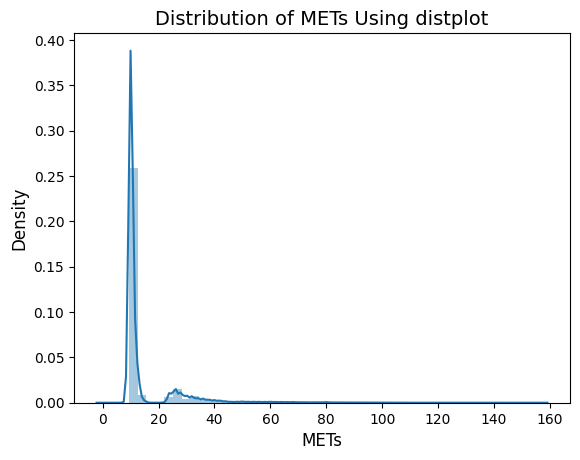

In [ ]:
#Creating a distribution plot for METs
import matplotlib.pyplot as plt
sns.distplot(MinutesMerged_df['METs'])
plt.xlabel('METs', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of METs Using distplot', fontsize=14)
plt.show()

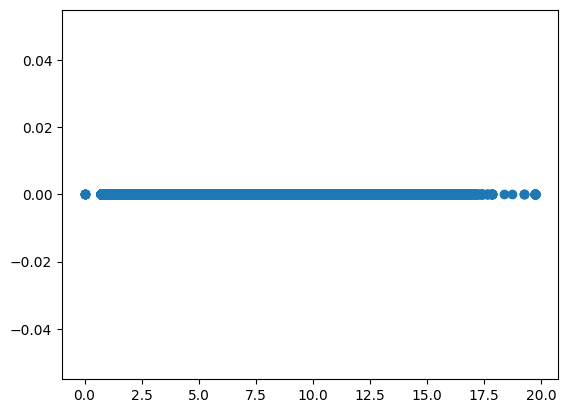

In [ ]:
#Creating a 1D Scatter plot for calories
plt.plot(MinutesMerged_df['Calories'],np.zeros_like(MinutesMerged_df['Calories']),'o')
plt.show()

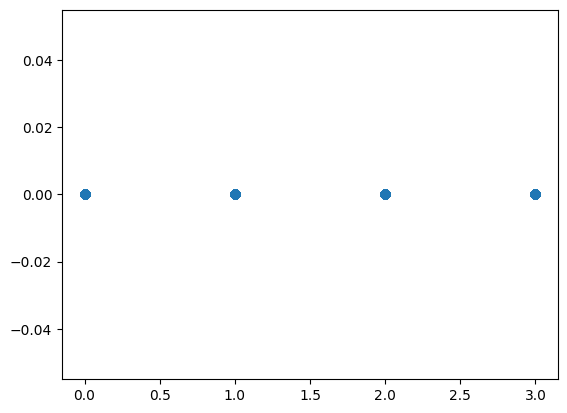

In [ ]:
#Creating a 1D Scatter plot for Intensity
plt.plot(MinutesMerged_df['Intensity'],np.zeros_like(MinutesMerged_df['Intensity']),'o')
plt.show()

#Bivariate & Multivariate Analysis

<ipython-input-20-5372bab2dbb0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='METs', y='Weekday', data=MinutesMerged_df, palette="rocket", orient ='h')


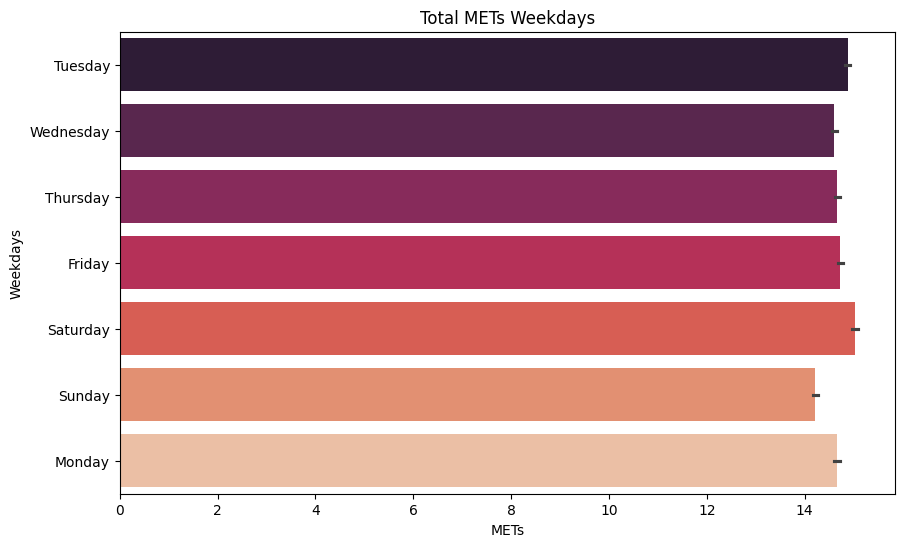

In [ ]:
#Lets chk out & analyse the METs on Weekdays.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='METs', y='Weekday', data=MinutesMerged_df, palette="rocket", orient ='h')
plt.xlabel('METs')
plt.ylabel('Weekdays')
plt.title('Total METs Weekdays')
plt.show()
#As visible, max METs appear on Saturday closely followed by Tuesday.

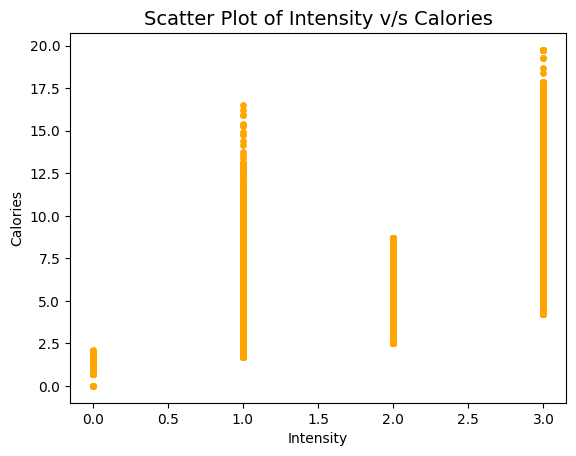

In [ ]:
#Creating a scatter plot between intensity and calories
MinutesMerged_df.plot(kind='scatter', x='Intensity', y='Calories', s=15, alpha=1, color='orange')
plt.title('Scatter Plot of Intensity v/s Calories', fontsize=14)
plt.show()

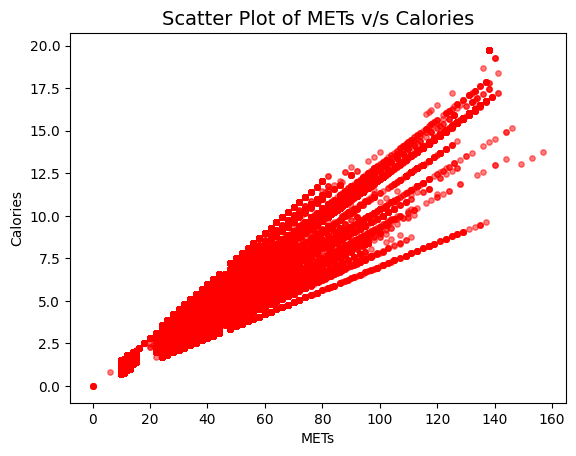

In [ ]:
#Analysing a scatter plot for METs & Calories. Higher the METs, higher the calories!
MinutesMerged_df.plot(kind='scatter', x='METs', y='Calories', s=15, alpha=0.5, color='red')
plt.title('Scatter Plot of METs v/s Calories', fontsize=14)
plt.show()

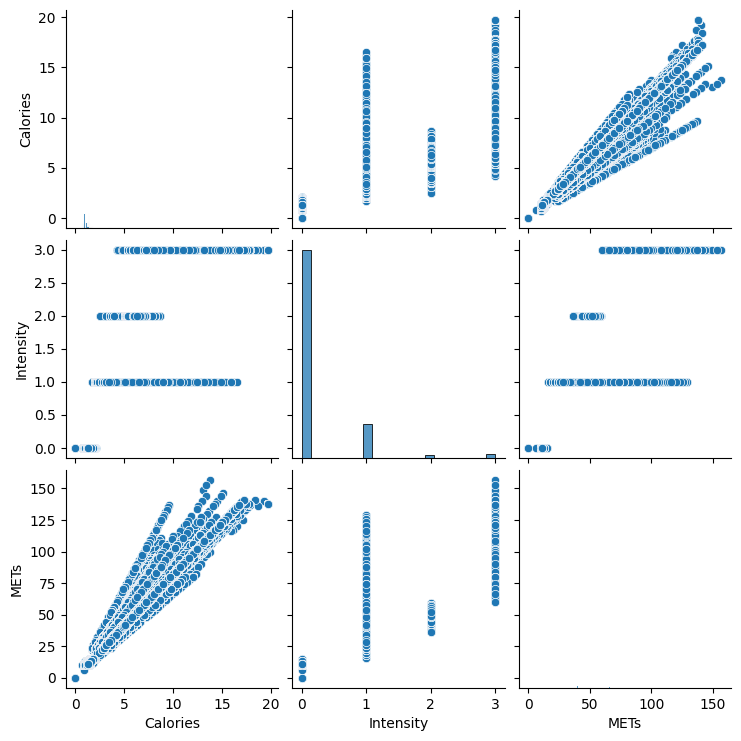

In [ ]:
#Plotting a pair plot to analyse the relationships among Calories, Intensity & METs.
sns.pairplot(MinutesMerged_df[['Calories', 'Intensity', 'METs']])
plt.show()

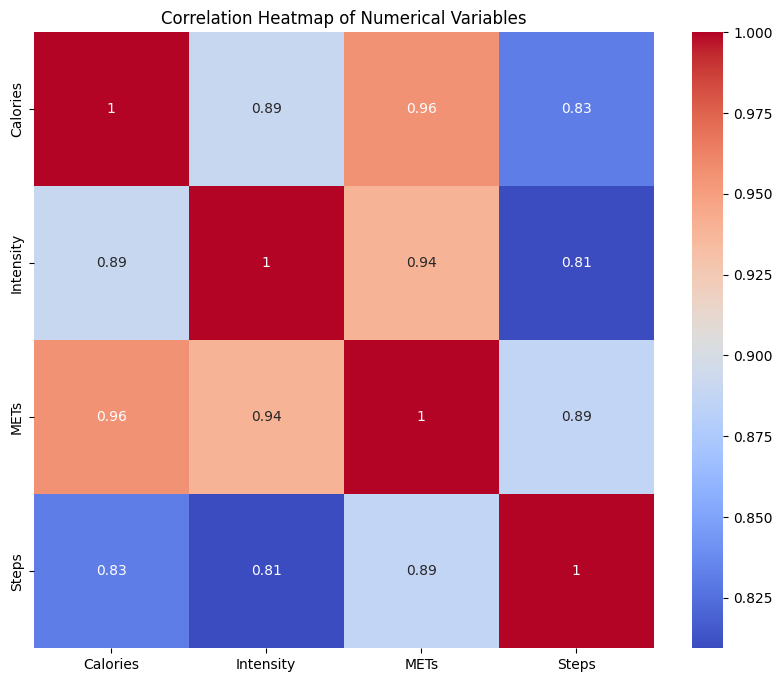

In [ ]:
#Creating a correlation heatmap matrix to analyse relationships among the numerical columns!
numerical_columns = ['Calories', 'Intensity', 'METs', 'Steps']
correlation_matrix = MinutesMerged_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()
#As displayed, Calories & METs have highest correlation. Followed by METs & Intensity correlation.

<Figure size 1000x600 with 0 Axes>

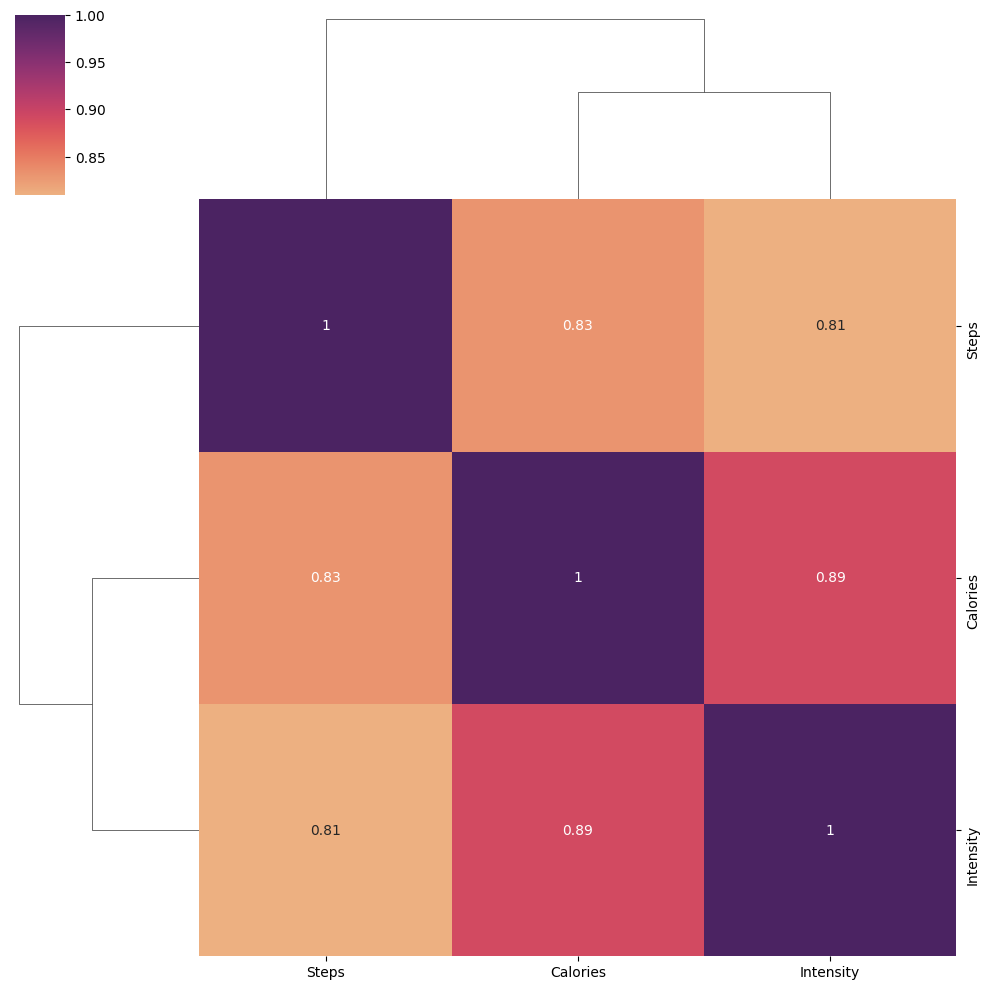

In [ ]:
#Let's take one final plot and complete our EDA - A cluster map using seaborn. It is basically a clustered heatmap for numerical columns. A heatmap, as we know, represents the correlation matrix b/w columns.
#Cluster map refers to hierarchal clustering applied to rows and columns of a hatmap based on their similarity in terms of correlation. the colors here represent the strength of correlation.
#A darker color indicates stronger correlation( can be either +ve or -ve )!
numerical_columns = ['Calories', 'Intensity', 'Steps']
plt.figure(figsize=(10,6))
sns.clustermap(MinutesMerged_df[numerical_columns].corr(), annot=True, cmap='flare')
plt.show()

In [ ]:
#Exported df to csv
MinutesMerged_df.to_csv('/content/MinutesData.csv', index=False)

# **CONCLUSION --**
# With this we come to the end of our Exploratory Data Analysis! EDA ia an extensive process which involves digging deeper into the dataset and exploring hidden data which will help us analyze our results based on independent and dependent variables in an informed manner and gain better insight into the data via various methods of analysis. EDA involvs visualizations which help decipher the meaning of data and communicate our results to the user smoothly. Visualisations help in indentifying patterns and trends presnt in the dataset which can further aid in hypothesis generation - it is a form of interactive exploration! In this dataset, I was able to explore and gain insights using different types of plots such as scatter plots(useful for both unvariate and bi variate analysis), heatmaps for different numerical data entries and the concept of clustering using a clustermap!